수도권 초등학교 학급 당 학생 수와 입시학원 수 상관관계 알아보기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 기호 설정

from IPython.display import set_matplotlib_formats # 폰트가 선명하게 보이도록
set_matplotlib_formats('retina')

# 데이터 불러오기
    
**< 필요한 데이터 >**
* 교육부_통합제공 정보공시 초중등학교 현황(학생수, 학급수) (2021-03-30)   
https://www.data.go.kr/data/15037483/fileData.do
 
<s>* 소상공인시장진흥공단_상가(상권)정보 (2021-06-15)</s>   
https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15083033
* 서울특별시 학원 교습소정보 (2021.07.19)   
http://data.seoul.go.kr/dataList/OA-20528/S/1/datasetView.do

# 서울 시내 초등학교 학생 수 분석
## 데이터 전처리

In [2]:
df_students = pd.read_csv('data/school/1. 2020년도_학교현황(학생수,학급수)_초등학교.csv', encoding='cp949')

# 서울특별시 초등학교만 가져옵니다.
df_students_s = df_students[df_students['시도교육청']=='서울특별시교육청'].copy()
df_students_s.head(3)

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
0,서울특별시교육청,교육부,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,4,4,4,5,5,5,1,0,28(1),614(6),21.93
1,서울특별시교육청,교육부,서울특별시 종로구,S000003563,서울대학교사범대학부설초등학교,2,국립,5,5,5,5,5,5,1,0,31(1),627(7),20.23
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000738,서울개일초등학교,2,공립,5,5,5,6,5,6,0,0,32(0),945(0),29.53


In [3]:
# '지역'에서 구 이름만 추출한 새로운 칼럼 '구'를 만듭니다.

import re
def get_gu(text):
    text = re.sub('(.+\s)(.+)', r'\2', text)
    return text

df_students_s['구'] = df_students_s['지역'].map(get_gu)
df_students_s.head(1)

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수,구
0,서울특별시교육청,교육부,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,4,4,4,5,5,5,1,0,28(1),614(6),21.93,서초구


In [4]:
# 학생수(계)에서 괄호를 제외한 숫자만 남깁니다.

def get_num(data):
    data = re.sub('(\d+)(.+)', r'\1', data)
    return int(data)

df_students_s['학생수'] = df_students_s['학생수(계)'].map(get_num)
df_students_s.head(1)

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수,구,학생수
0,서울특별시교육청,교육부,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,4,4,4,5,5,5,1,0,28(1),614(6),21.93,서초구,614


## 구별 학급당 학생 수 시각화

<AxesSubplot:title={'center':'< 구별 학급당 학생 수 >'}, xlabel='구', ylabel='학급당학생수'>

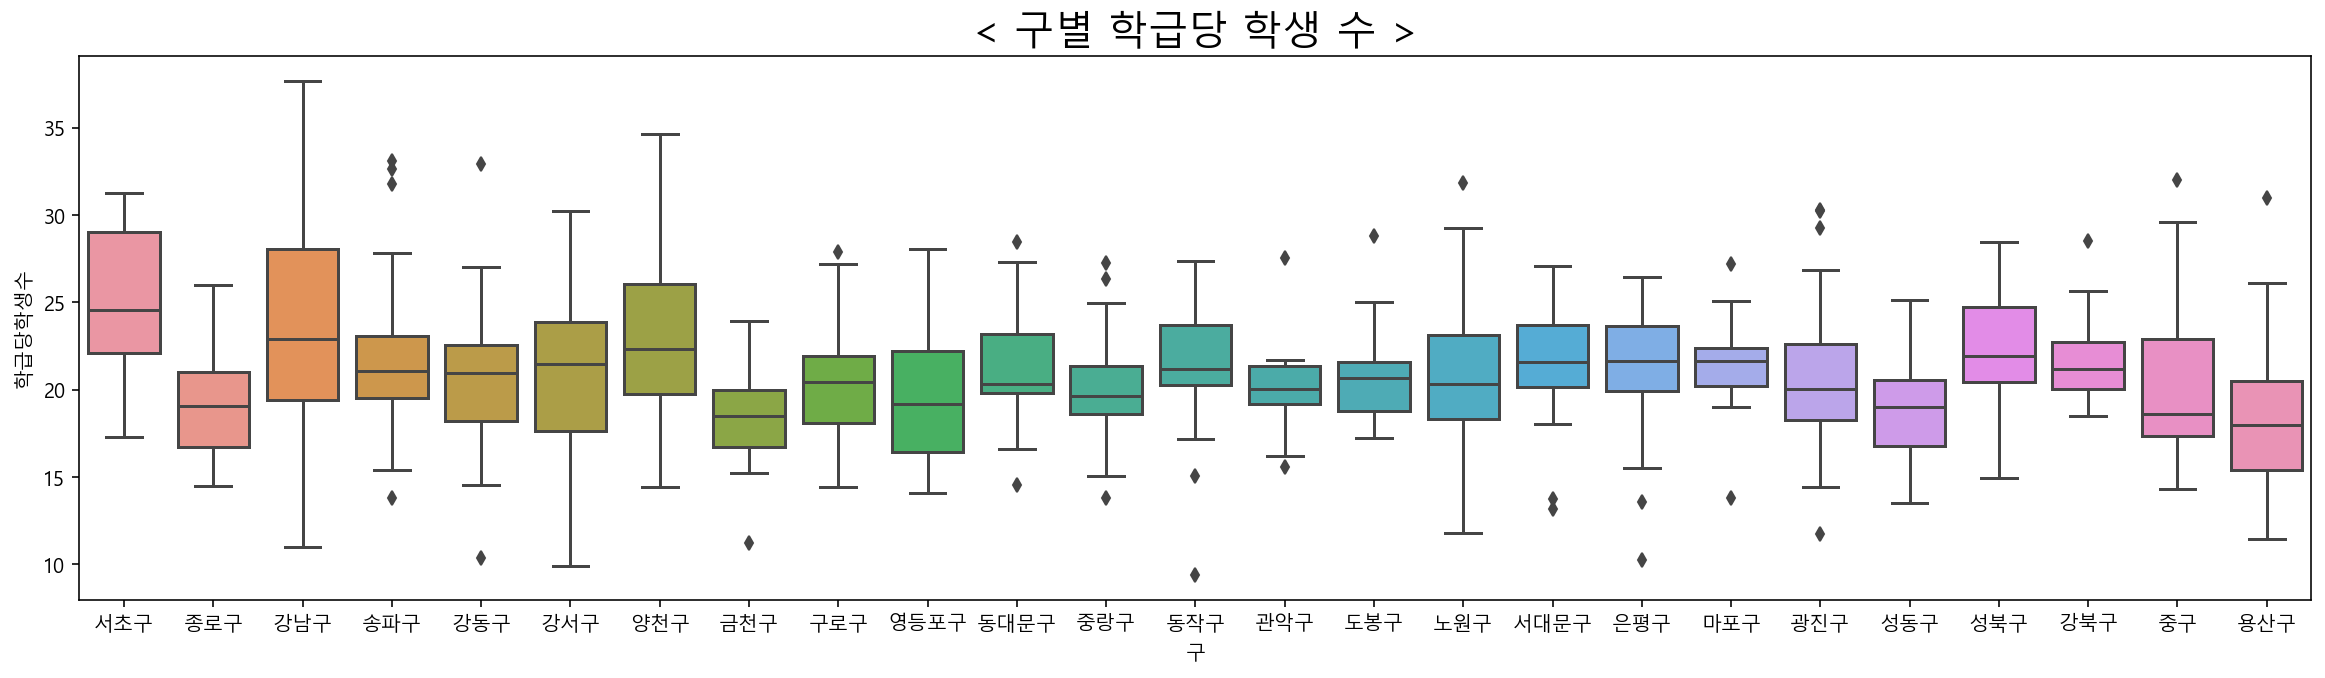

In [21]:
plt.figure(figsize=(20,5))
plt.title('< 구별 학급당 학생 수 >', fontsize=20)
sns.boxplot(data=df_students_s, x='구', y='학급당학생수')

강남구 학급당 학생 수 스펙트럼이 넓은 듯 하다.

# 학원 분석
## 데이터 전처리

In [6]:
df = pd.read_csv('data/commerce/서울특별시 학원 교습소정보.csv', encoding='cp949')
# 칼럼이 너무 많으므로 필요한 칼럼만 가져옵니다.
df_academy = df[['행정구역명', '학원/교습소', '학원명', '도로명주소', '도로명상세주소', '분야명', '교습계열명',
       '교습과정목록명', '교습과정명', '정원합계', '일시수용능력인원합계']].copy()

# 데이터 살펴보기
print('분야명 :', df_academy['분야명'].unique(), '\n')
print("분야명이 '입시.검정 및 보습'인 데이터.shape :", df_academy[df_academy['분야명']=='입시.검정 및 보습'].shape, '\n\n')

print('교습계열명 :', df_academy['교습계열명'].unique(), '\n')
print("교습계열명이 '보통교과'인 데이터.shape :", df_academy[df_academy['교습계열명']=='보통교과'].shape)

분야명 : ['직업기술' '종합(대)' '예능(대)' '입시.검정 및 보습' '기타(대)' '국제화' '독서실' '인문사회(대)' '기예(대)'
 '특수교육(대)' '정보'] 

분야명이 '입시.검정 및 보습'인 데이터.shape : (13210, 11) 


교습계열명 : ['산업응용기술' nan '산업기반기술' '예능(중)' '보통교과' '기타(중)' '외국어' '독서실' '컴퓨터' '독서실(중)'
 '인문사회(중)' '국제' '간호보조기술' '기예(중)' '경영?사무관리' '문화관광' '산업서비스' '진학지도' '일반서비스'
 '특수교육(중)' '정보'] 

교습계열명이 '보통교과'인 데이터.shape : (13110, 11)


In [7]:
df_academy[(df_academy['분야명']=='입시.검정 및 보습') & (df_academy['교습계열명']!='보통교과')]['교습계열명'].unique()

array(['진학지도', '외국어', '기타(중)'], dtype=object)

In [8]:
# 10대 학생들이 많은 학원만 가져옵니다.

df_academy_teen = df_academy[df_academy['분야명']=='입시.검정 및 보습'].copy()
df_academy_teen.head(3)

,행정구역명,학원/교습소,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,정원합계,일시수용능력인원합계
5,중랑구,학원,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층3층 (묵동),입시.검정 및 보습,보통교과,보습/,보습,18,152.0
6,중랑구,학원,세진보습학원,서울특별시 중랑구 공릉로 58,2층4층일부 (묵동),입시.검정 및 보습,보통교과,보습?논술/,보습?논술,675,110.0
8,동대문구,학원,장안로드맵수학학원,서울특별시 동대문구 한천로 124,/ 2층 202호 (장안동),입시.검정 및 보습,보통교과,보습/,보습,154,71.0


## 구별 학원 수 시각화

<AxesSubplot:title={'center':'< 구별 학원 수 >'}, xlabel='행정구역명', ylabel='count'>

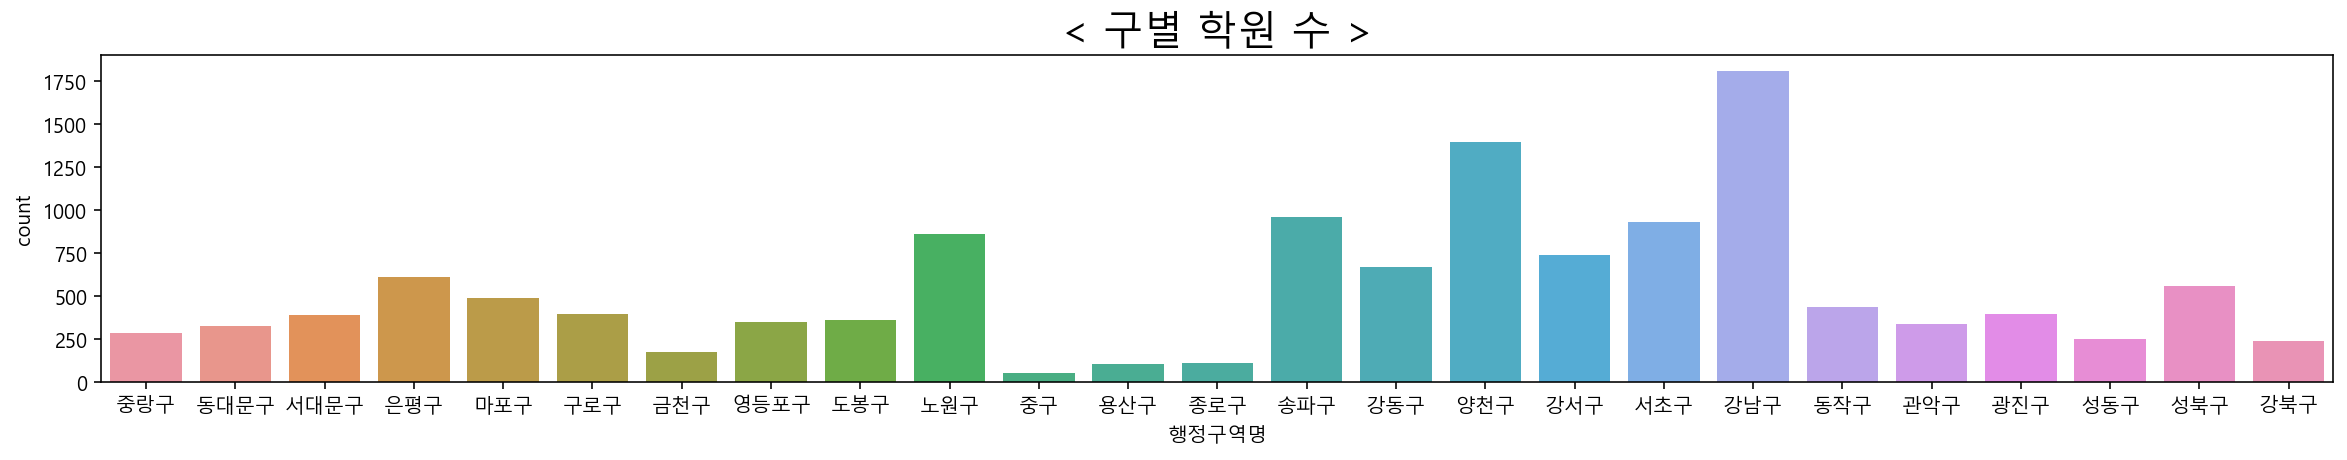

In [23]:
plt.figure(figsize=(20,3))
plt.title('< 구별 학원 수 >', fontsize=20)
sns.countplot(data=df_academy_teen, x='행정구역명')

# 구별 학생 수와 학원 수 비교 분석

<AxesSubplot:title={'center':'< 구별 학생 수 >'}, xlabel='구'>

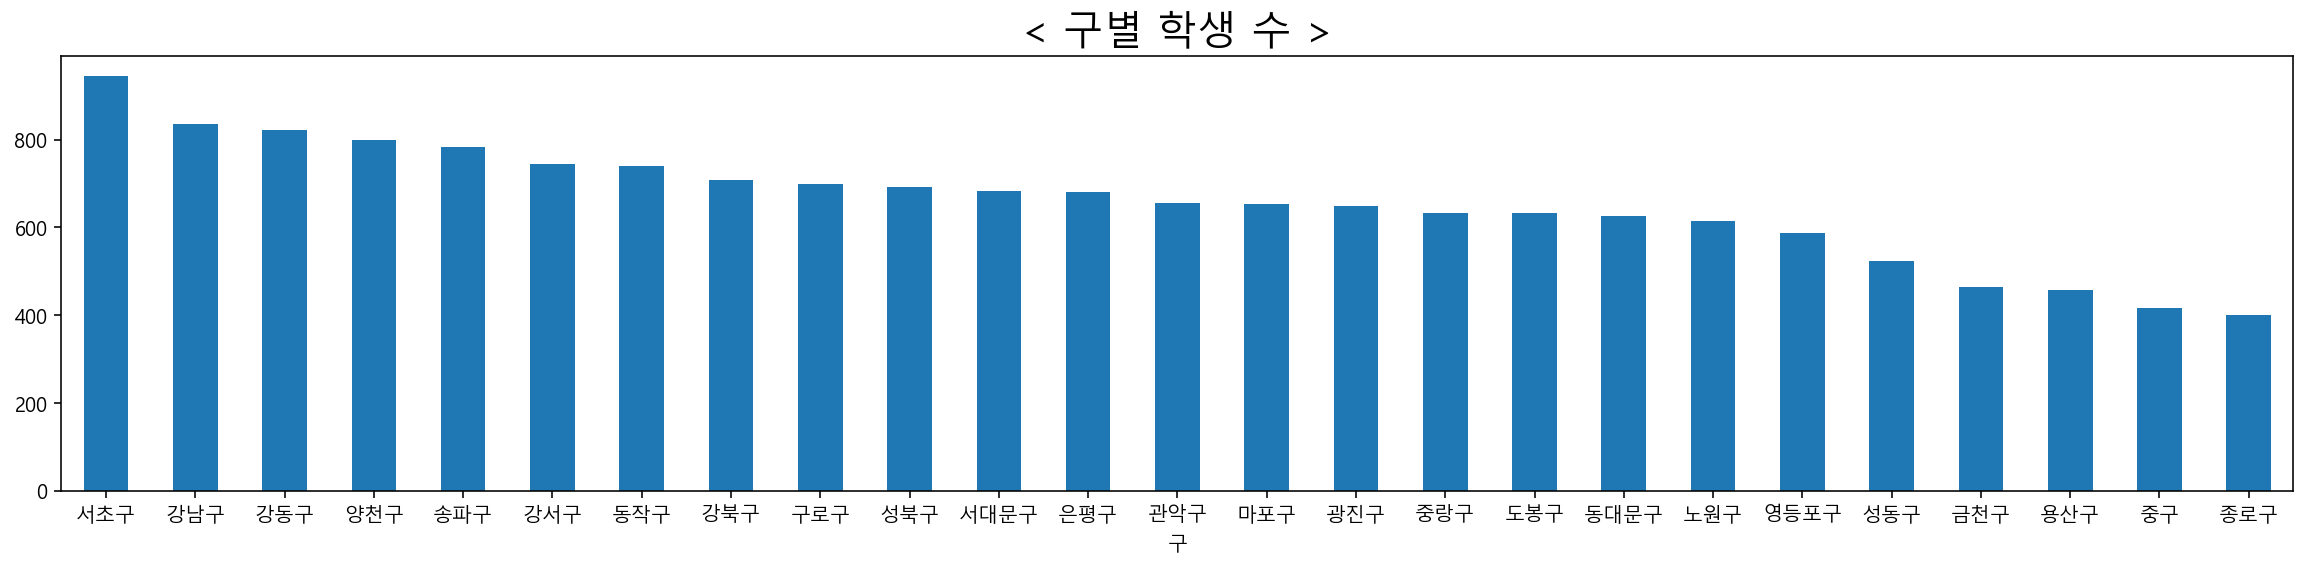

In [24]:
plt.title('< 구별 학생 수 >', fontsize=20)
df_students_s.groupby(['구'])['학생수'].mean().sort_values(ascending=False).plot.bar(figsize=(20,4), rot=0)

<AxesSubplot:title={'center':'< 구별 학급당 학생 수 >'}, xlabel='구'>

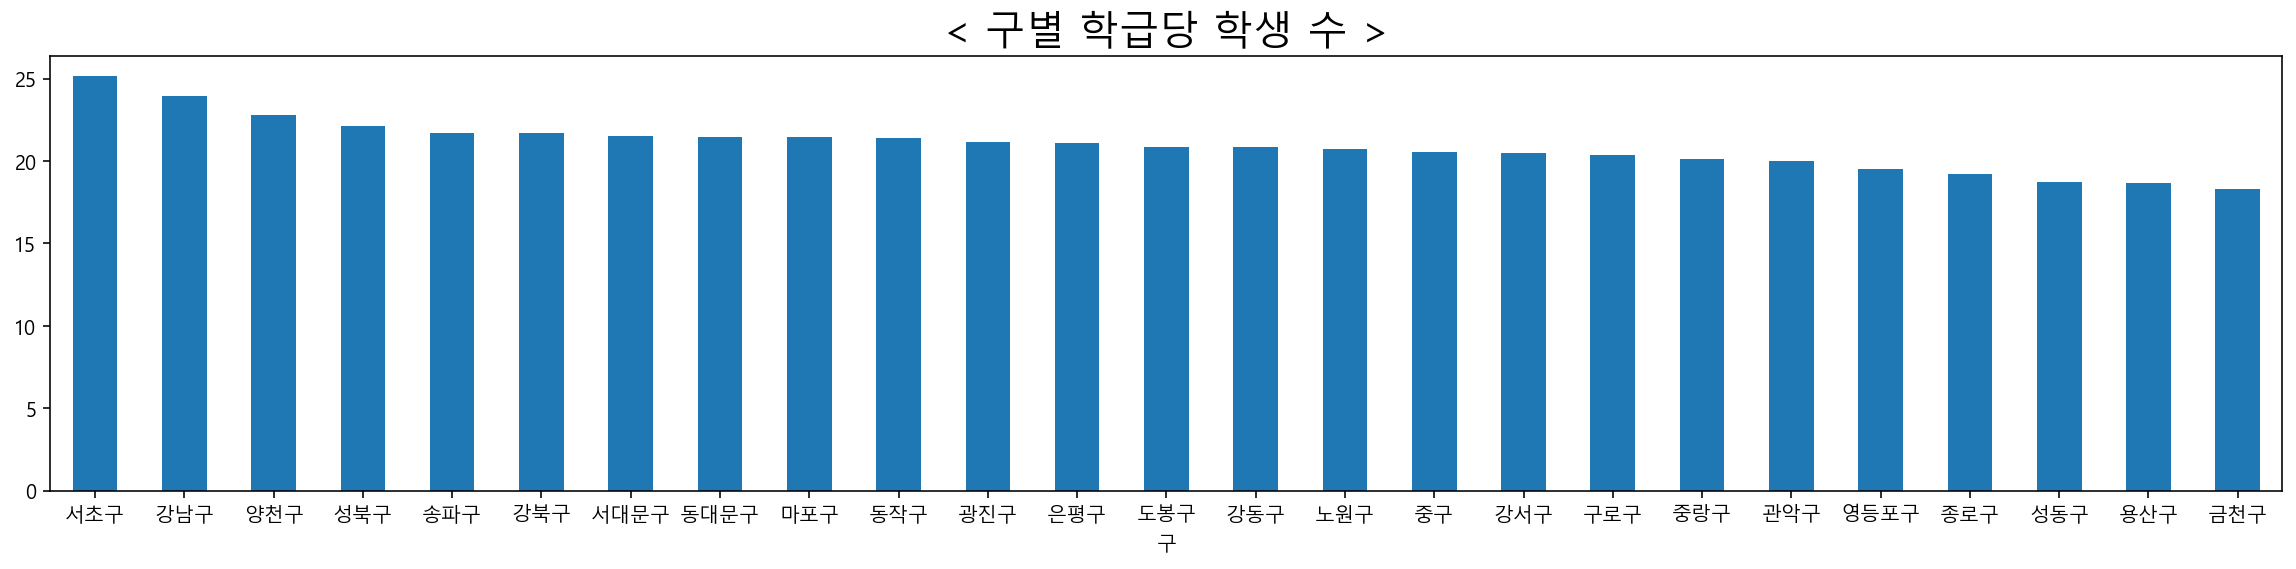

In [25]:
plt.title('< 구별 학급당 학생 수 >', fontsize=20)
df_students_s.groupby(['구'])['학급당학생수'].mean().sort_values(ascending=False).plot.bar(figsize=(20,4), rot=0)

<AxesSubplot:title={'center':'< 구별 학원 수 >'}>

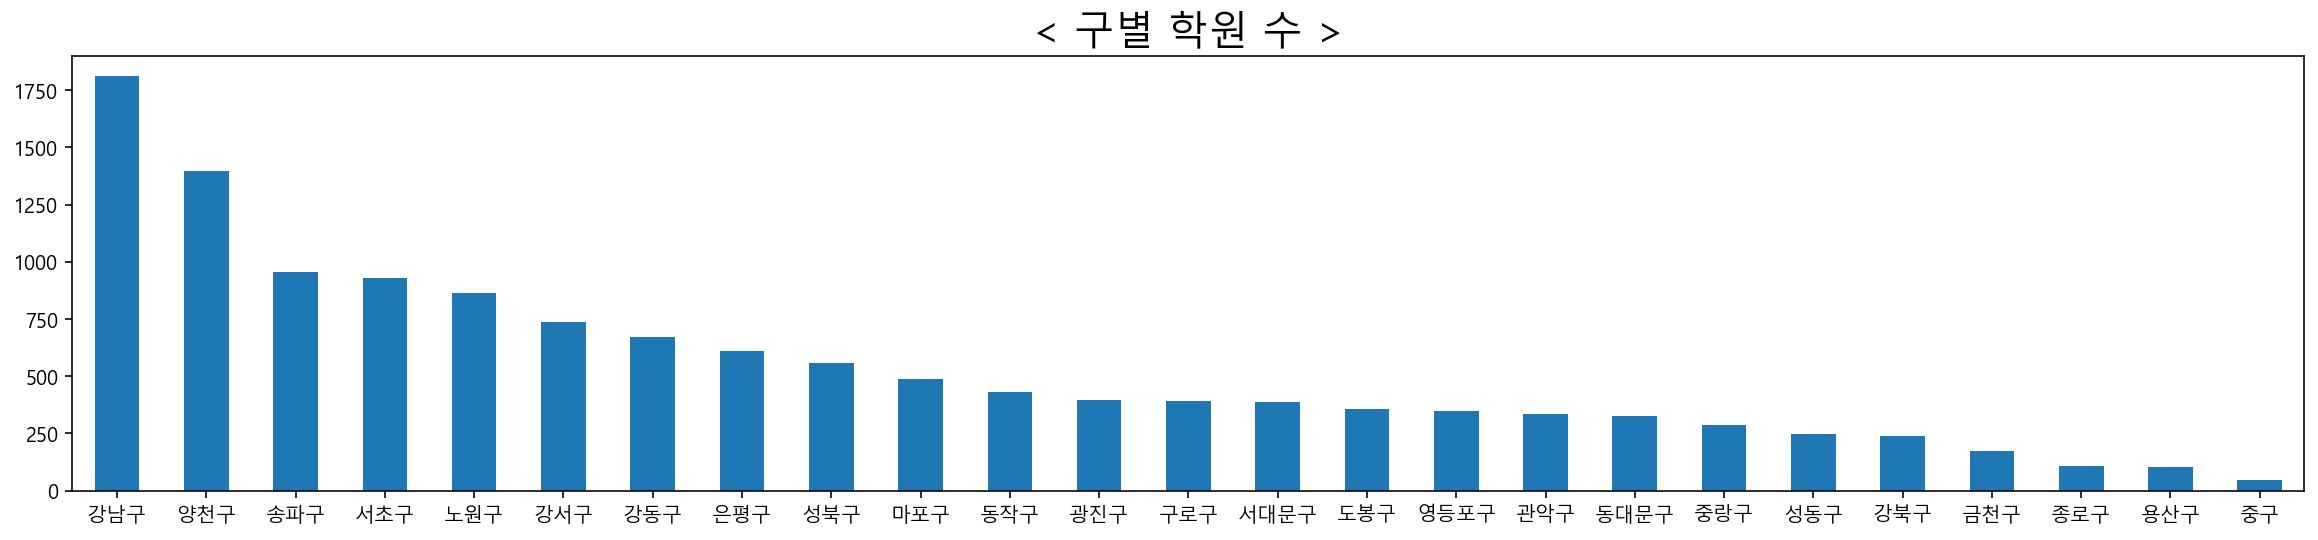

In [26]:
plt.title('< 구별 학원 수 >', fontsize=20)
df_academy_teen['행정구역명'].value_counts().plot.bar(figsize=(20,4), rot=0)

In [13]:
top5_total_students = df_students_s.groupby(['구'])['학생수'].mean().sort_values(ascending=False).head()
top5_class_students = df_students_s.groupby(['구'])['학급당학생수'].mean().sort_values(ascending=False).head()
top5_academy = df_academy_teen['행정구역명'].value_counts().head()

df_top5 = pd.concat([top5_total_students, top5_class_students, top5_academy], axis=1)
df_top5.rename(columns={'행정구역명':'학원수'}, inplace=True)
df_top5

,학생수,학급당학생수,학원수
서초구,944.500000,25.139167,931.0
강남구,835.645161,23.922903,1810.0
강동구,821.269231,NaN,NaN
양천구,799.500000,22.805667,1396.0
송파구,784.325000,21.735250,957.0
성북구,NaN,22.123103,NaN
노원구,NaN,NaN,862.0


## 시사점
- 강남구와 서초구는 학생 수와 학급당 학생 수 공통으로 1, 2위이다.   
- 학생수, 학급당학생수, 학원수 모두 top5에 해당되는 곳 : 서초구, 강남구, 양천구, 송파구

---------------

# 번외
## 각 시도별 학급당 학생 수 분석

<AxesSubplot:title={'center':'< 시도별 학급당 학생 수 평균 >'}, xlabel='시도교육청'>

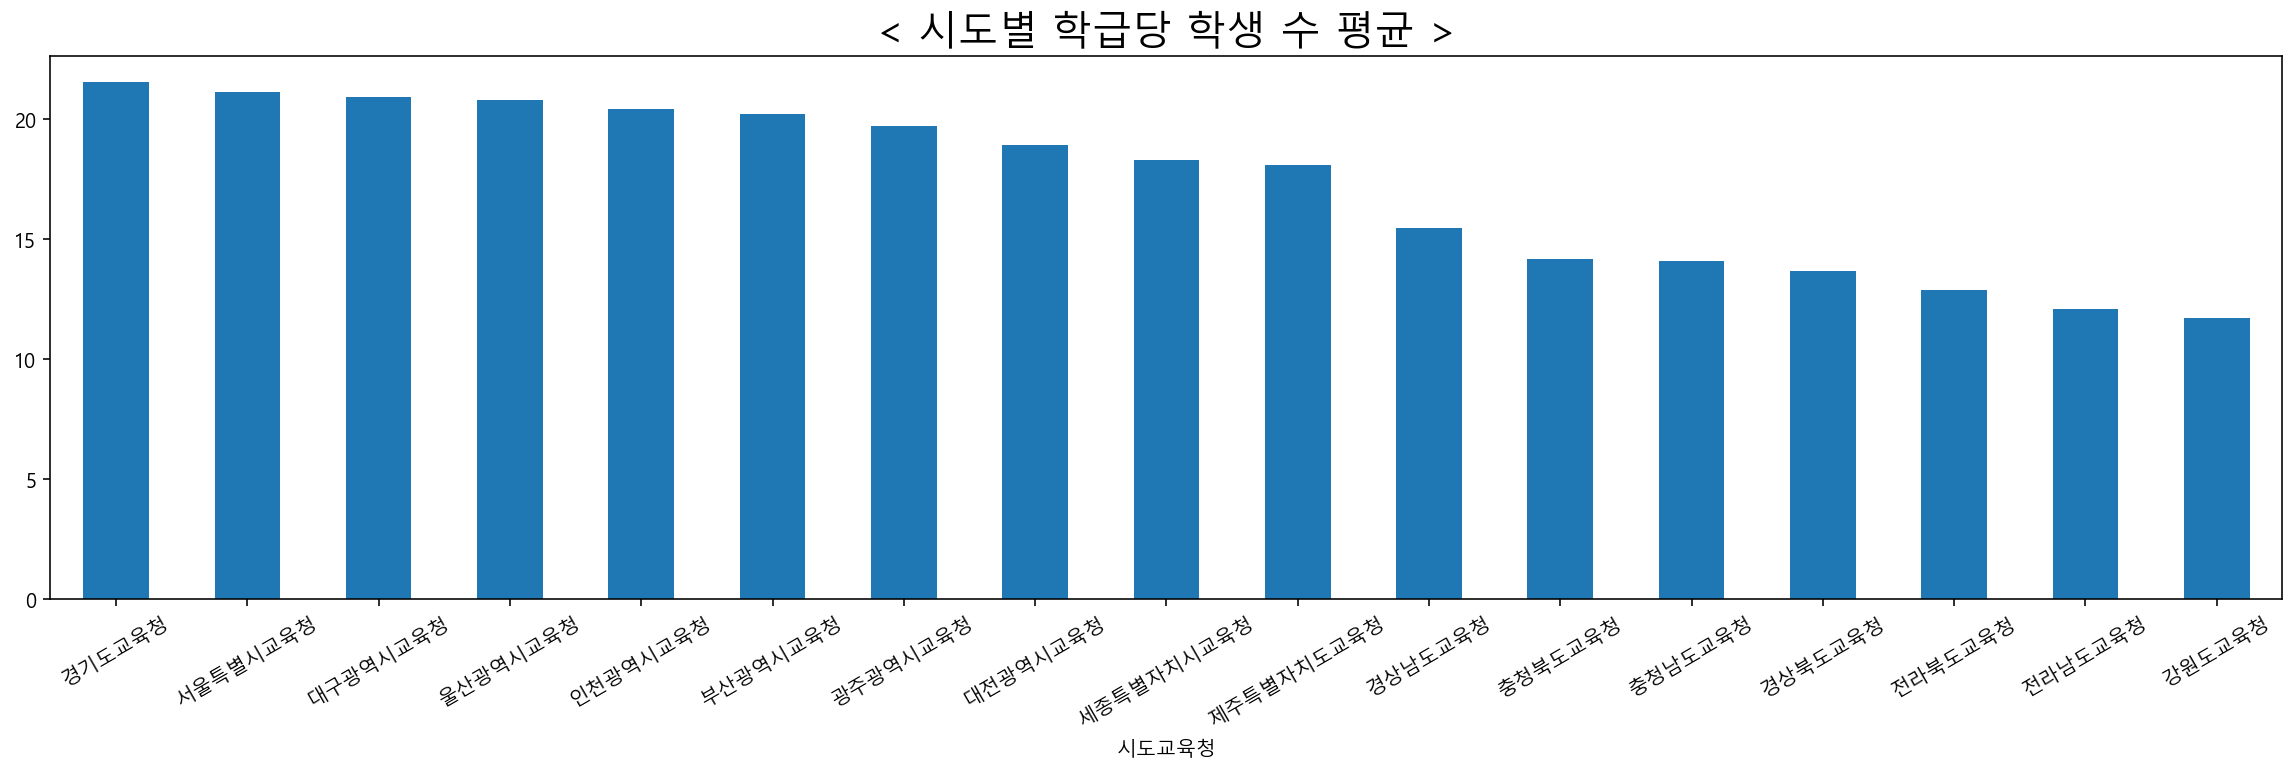

In [20]:
plt.title('< 시도별 학급당 학생 수 평균 >', fontsize=20)
df_students.groupby(['시도교육청'])['학급당학생수'].mean().sort_values(ascending=False).plot.bar(figsize=(20,5), rot=30)

[Text(0, 0, '경기도교육청'),
 Text(1, 0, '서울특별시교육청'),
 Text(2, 0, '대구광역시교육청'),
 Text(3, 0, '울산광역시교육청'),
 Text(4, 0, '인천광역시교육청'),
 Text(5, 0, '부산광역시교육청'),
 Text(6, 0, '광주광역시교육청'),
 Text(7, 0, '대전광역시교육청'),
 Text(8, 0, '세종특별자치시교육청'),
 Text(9, 0, '제주특별자치도교육청'),
 Text(10, 0, '경상남도교육청'),
 Text(11, 0, '충청북도교육청'),
 Text(12, 0, '충청남도교육청'),
 Text(13, 0, '경상북도교육청'),
 Text(14, 0, '전라북도교육청'),
 Text(15, 0, '전라남도교육청'),
 Text(16, 0, '강원도교육청')]

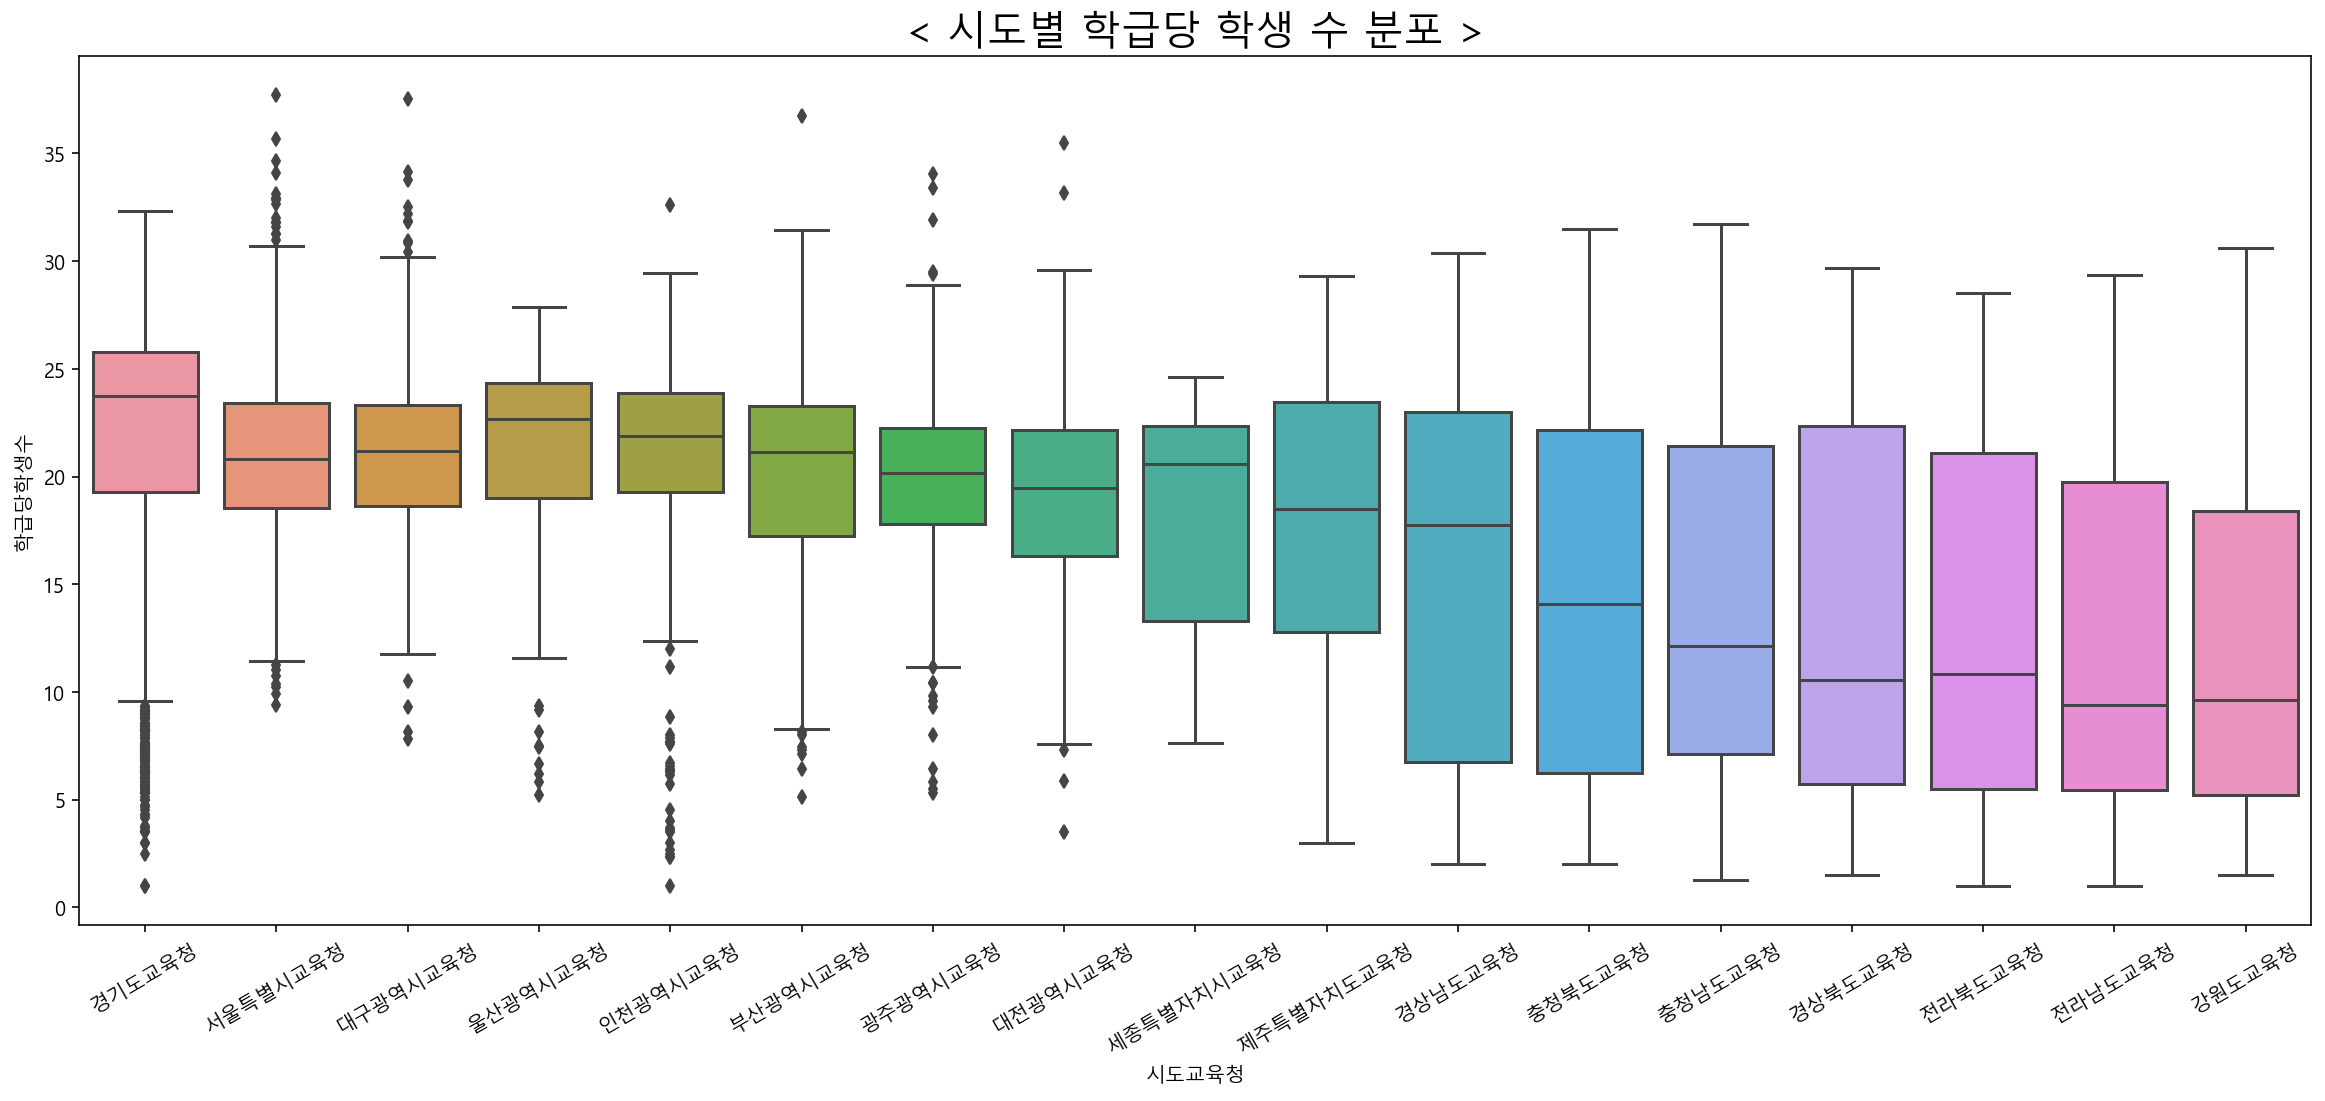

In [43]:
plt.figure(figsize=(20,8))
plt.title('< 시도별 학급당 학생 수 분포 >', fontsize=20)
order = df_students.groupby(["시도교육청"])["학급당학생수"].mean().sort_values(ascending=False).index

g = sns.boxplot(data=df_students, x='시도교육청', y='학급당학생수', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Reveiw

## 아쉬운 점
아래 중분류명에서 어떤 부류가 10대 학생들이 많이 다니는지 알 수 없었다.

In [15]:
# pd.options.display.max_columns = 39
# df_commerce = pd.read_csv('data/commerce/소상공인시장진흥공단_상가(상권)정보_서울_202103.csv')

# print(df_commerce.columns, '\n')
# print(df_commerce['상권업종대분류명'].unique(), '\n')

# df_commerce_edu = df_commerce[df_commerce['상권업종대분류명']=='학문/교육'].copy()
# print(df_commerce_edu['상권업종중분류명'].unique())
# print(df_commerce_edu[df_commerce_edu['상권업종중분류명']=='학원-보습교습입시'].shape) # 위의 교습소 데이터보다 숫자가 적다.

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object') 

['음식' '소매' '학문/교육' '생활서비스' '부동산' '관광/여가/오락' '숙박' '스포츠'] 

['학원-보습교습입시' '학원-창업취업취미' '도서관/독서실' '학원기타' '학원-예능취미체육' '학문교육기타' '학원-음악미술무용'
 '학원-어학' '유아교육' '학원-자격/국가고시' '학원-컴퓨터' '기타교육기관' '특수교육기관']   
(4713, 39)